<a href="https://colab.research.google.com/github/Git-Hub-Ran/Deep_Learning/blob/main/Deep_Learning_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digit Recognizer : https://www.kaggle.com/competitions/digit-recognizer/data

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset


In [ ]:
#Delete existing files if exist:
!rm -f train.csv train.csv.1 test.csv test.csv.1

#loading the files :
!wget https://raw.githubusercontent.com/vardhan-siramdasu/Kaggle-Digit-Recognizer/main/data/train.csv
!wget https://raw.githubusercontent.com/vardhan-siramdasu/Kaggle-Digit-Recognizer/main/data/test.csv
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#looking at the data:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


--2025-11-05 08:25:19--  https://raw.githubusercontent.com/vardhan-siramdasu/Kaggle-Digit-Recognizer/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76733040 (73M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  73.18M   244MB/s    in 0.3s    

2025-11-05 08:25:20 (244 MB/s) - ‘train.csv’ saved [76733040/76733040]

--2025-11-05 08:25:20--  https://raw.githubusercontent.com/vardhan-siramdasu/Kaggle-Digit-Recognizer/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 **Prepare the data :**

In [ ]:
# Using 'values' to flatten the data:
X_train = train.drop('label', axis=1).values.astype('float32') / 255.0
Y_train = train['label'].values
X_test = test.values.astype('float32') / 255.0

In [ ]:
#Train Test Split:
x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train,test_size=0.2, random_state=41)

In [ ]:
#Convert to PyTorch Tensors:
x_train = torch.FloatTensor(x_train)
x_val   = torch.FloatTensor(x_val)
x_test  = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_val   = torch.LongTensor(y_val)


In [ ]:
#Create a Model Class that inherits nn.Module:
class Model(nn.Module):
  #input layer: input (X) -->hidden layer 1 -->hidden layer 2 -->output (10 classes of 0-9 digits)
  def __init__(self, in_features=28*28, h1=128, h2=64, output=10):
      super().__init__() #instantiate our nn.Module
      self.fc1 = nn.Linear(in_features, h1)
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, output)

  #move data forward from x-->h1-->h2-->output:
  def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)
      return x

In [ ]:
#Pick a manual seed for randomization:
torch.manual_seed(41)

#Create an instance of model:
model = Model()

In [ ]:
#Set the criterion of the model to measure the error:
criterion = nn.CrossEntropyLoss() #Creating an instance of the class CrossEntropyLoss

#We want to optimize the loss after each iteration: Choose Adam optimizer and learning rate :
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#Show the parameters to see that we are going from fc1-->fc2-->out
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)>


In [ ]:
#Train our model:

#The number of times the model goes over the entire training set during training.
num_epochs = 100

losses = []

for epoch in range(num_epochs):
    model.train()

    # Go forward and get a prediction of Y:
    y_pred = model.forward(x_train) # Get predicted results

    # Measure the loss:
    loss = criterion(y_pred, y_train)#predicted values vs the y_train

    # Keep track of our losses:
    losses.append(loss.detach().numpy())
    # Print every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item():.4f}")

    # Backpropagation:
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, Loss: 2.3097
Epoch: 10, Loss: 1.9061
Epoch: 20, Loss: 1.2092
Epoch: 30, Loss: 0.7014
Epoch: 40, Loss: 0.4906
Epoch: 50, Loss: 0.3925
Epoch: 60, Loss: 0.3390
Epoch: 70, Loss: 0.3056
Epoch: 80, Loss: 0.2815
Epoch: 90, Loss: 0.2622


Text(0.5, 0, 'Epoch')

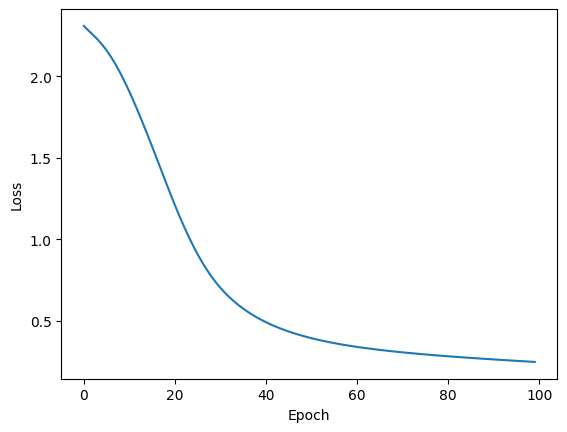

In [ ]:
#Graph the loss:
plt.plot(range(num_epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")


In [ ]:
#Evaluate the model on test dataset (Validation Set):

model.eval()# Telling teh network that we are not training anymore
with torch.no_grad(): #turn off back propogation( we don't want to do back propatgation for the test data)
    val_outputs = model.forward(x_val) #send the data forward threw our model : x_val is the data from the test set , val_outputs will be predictions

    # torch.max is saying:
    # Find the largest value along axis 1 (the highest score for each sample),
    # and also return the index of that value (which are actually the number that the model predicts)
    max_values, predicted_classes = torch.max(val_outputs, 1)

    # Comparing predictions to actual values:
    #The condition predicted_classes == y_val will creates a vector of True/False for each example
    #sum() sums up all the True (equal to 1), it counts how many predictions were correct.
    correct = (predicted_classes == y_val).sum().item()

    # accuracy calculation:
    val_acc = correct / y_val.size(0)
    print(f"Validation Accuracy: {val_acc:.4f}")

Validation Accuracy: 0.9257


In [ ]:

#Doing the same for Test dataset:
model.eval()
with torch.no_grad():
    test_outputs = model.forward(x_test)
    test_max_values, test_pred = torch.max(test_outputs, 1)
# test_pred now contains predicted labels.